PREDICTION OF HOUSE PRICES USING LINEAR, GRADIENT BOOSTING REGRESSION AND DEEP LEARNING METHODS

In [676]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [677]:
data=pd.read_csv("DS - Assignment Part 1 data set.csv")
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [678]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


IMPLEMENTING LINEAR REGRESSION ON THE MODEL

In [679]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split

In [680]:
labels=data["House price of unit area"]
train=data.drop(["House price of unit area"],axis=1)

In [681]:
lr=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(train,labels,test_size=0.1,random_state=4)
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

CHECKING THE ACCURACY WITH LINEAR REGRESSION

In [693]:
lr_score = lr.score(xtest,ytest)
print(lr_score)

0.6150438197660137


IMPLEMENTING GRADIENT BOOSTING REGRESSION

In [683]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 5)
gbr.fit(xtrain, ytrain)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

CHECKING THE ACCURACY WITH GRADIENT BOOSTING REGRESSION

In [694]:
gbr_score = gbr.score(xtest,ytest) 
print(gbr_score)

0.7819911609241614


IMPLEMENTING DEEP LEARNING

In [685]:
dataset = data.values
X = dataset[:,0:8]
Y = dataset[:,8]

In [686]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [687]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

In [688]:
from keras.models import Sequential
from keras.layers import Dense

In [689]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),
])

In [690]:
model.compile(optimizer='Adam',loss='MeanSquaredError',)

In [691]:
hist = model.fit(X_train, Y_train, batch_size = 64, epochs=400)
Y_pred = model.predict(X_test)

Epoch 1/400
5/5 [==============================] - 0s 3ms/step - loss: 1673.3376
Epoch 2/400
5/5 [==============================] - 0s 0s/step - loss: 1657.7941
Epoch 3/400
5/5 [==============================] - 0s 0s/step - loss: 1644.3756
Epoch 4/400
5/5 [==============================] - 0s 0s/step - loss: 1631.2271
Epoch 5/400
5/5 [==============================] - 0s 0s/step - loss: 1617.0385
Epoch 6/400
5/5 [==============================] - 0s 2ms/step - loss: 1599.8713
Epoch 7/400
5/5 [==============================] - 0s 997us/step - loss: 1578.7467
Epoch 8/400
5/5 [==============================] - 0s 2ms/step - loss: 1552.7808
Epoch 9/400
5/5 [==============================] - 0s 997us/step - loss: 1521.1113
Epoch 10/400
5/5 [==============================] - 0s 1ms/step - loss: 1482.9991
Epoch 11/400
5/5 [==============================] - 0s 1ms/step - loss: 1436.0239
Epoch 12/400
5/5 [==============================] - 0s 1ms/step - loss: 1381.1045
Epoch 13/400
5/5 [=======

5/5 [==============================] - 0s 1ms/step - loss: 83.6108
Epoch 102/400
5/5 [==============================] - 0s 997us/step - loss: 83.5832
Epoch 103/400
5/5 [==============================] - 0s 1ms/step - loss: 83.1843
Epoch 104/400
5/5 [==============================] - 0s 1ms/step - loss: 83.0256
Epoch 105/400
5/5 [==============================] - 0s 748us/step - loss: 83.1127
Epoch 106/400
5/5 [==============================] - 0s 997us/step - loss: 82.6051
Epoch 107/400
5/5 [==============================] - 0s 997us/step - loss: 82.3889
Epoch 108/400
5/5 [==============================] - 0s 1ms/step - loss: 82.2124
Epoch 109/400
5/5 [==============================] - 0s 997us/step - loss: 82.1617
Epoch 110/400
5/5 [==============================] - 0s 748us/step - loss: 81.8980
Epoch 111/400
5/5 [==============================] - 0s 997us/step - loss: 82.0324
Epoch 112/400
5/5 [==============================] - 0s 997us/step - loss: 81.5484
Epoch 113/400
5/5 [=======

5/5 [==============================] - 0s 1ms/step - loss: 71.4878
Epoch 201/400
5/5 [==============================] - 0s 1ms/step - loss: 71.5068
Epoch 202/400
5/5 [==============================] - 0s 1ms/step - loss: 71.2629
Epoch 203/400
5/5 [==============================] - 0s 997us/step - loss: 71.1678
Epoch 204/400
5/5 [==============================] - 0s 0s/step - loss: 71.1791
Epoch 205/400
5/5 [==============================] - 0s 1ms/step - loss: 71.0486
Epoch 206/400
5/5 [==============================] - 0s 0s/step - loss: 70.9924
Epoch 207/400
5/5 [==============================] - 0s 1ms/step - loss: 70.9118
Epoch 208/400
5/5 [==============================] - 0s 0s/step - loss: 71.0579
Epoch 209/400
5/5 [==============================] - 0s 748us/step - loss: 70.8937
Epoch 210/400
5/5 [==============================] - 0s 499us/step - loss: 71.0406
Epoch 211/400
5/5 [==============================] - 0s 3ms/step - loss: 70.6781
Epoch 212/400
5/5 [====================

5/5 [==============================] - 0s 1ms/step - loss: 66.4315
Epoch 300/400
5/5 [==============================] - 0s 1ms/step - loss: 66.2436
Epoch 301/400
5/5 [==============================] - 0s 748us/step - loss: 66.4622
Epoch 302/400
5/5 [==============================] - 0s 1ms/step - loss: 66.2170
Epoch 303/400
5/5 [==============================] - 0s 997us/step - loss: 65.9956
Epoch 304/400
5/5 [==============================] - 0s 1ms/step - loss: 66.2132
Epoch 305/400
5/5 [==============================] - 0s 748us/step - loss: 66.2733
Epoch 306/400
5/5 [==============================] - 0s 1ms/step - loss: 66.0586
Epoch 307/400
5/5 [==============================] - 0s 997us/step - loss: 66.1434
Epoch 308/400
5/5 [==============================] - 0s 748us/step - loss: 65.9970
Epoch 309/400
5/5 [==============================] - 0s 1ms/step - loss: 65.9229
Epoch 310/400
5/5 [==============================] - 0s 997us/step - loss: 65.9338
Epoch 311/400
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 62.3401
Epoch 399/400
5/5 [==============================] - 0s 1ms/step - loss: 62.4412
Epoch 400/400
4/4 [==============================] - 0s 997us/step


CHECKING THE ACCURACY WITH DEEP LEARNING MODEL

In [696]:
from  sklearn.metrics import r2_score
dl_score = r2_score(Y_test,Y_pred)
print(dl_score)

0.7816289255945028


COMPARING THE ACCURACY WITH EACH MODELS

Text(0.5, 1.0, 'Accuracy with the three different models')

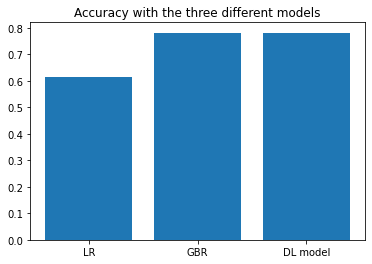

In [699]:
plt.bar(["LR","GBR","DL model"],[lr_score,gbr_score,dl_score])
plt.title("Accuracy with the three different models")

As we can see, the gradient boosting regression model and the deep learning model gives almost the same accuracy. Hence, we can choose either one of those to predict the prices of houses.